#Visulization Part-2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Prepare the data for plotting

In [3]:
netflix_data = pd.read_csv('netflix_titles.csv')
netflix_data['year_added'] = netflix_data['date_added'].str.slice(start=-4)
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [7]:
n_data_added = netflix_data.groupby(['year_added','type'],as_index=False).show_id.count()
n_data_added.columns = ['year_added','type','count']
n_data_added = n_data_added.pivot(index='year_added',columns='type',values='count').reset_index()
n_data_added.fillna(0,inplace=True)
n_data_added

type,year_added,Movie,TV Show
0,2017,182,115
1,2018,601,270
2,2019,682,470
3,2020,1033,574
4,2021,966,504


##Bar Chart

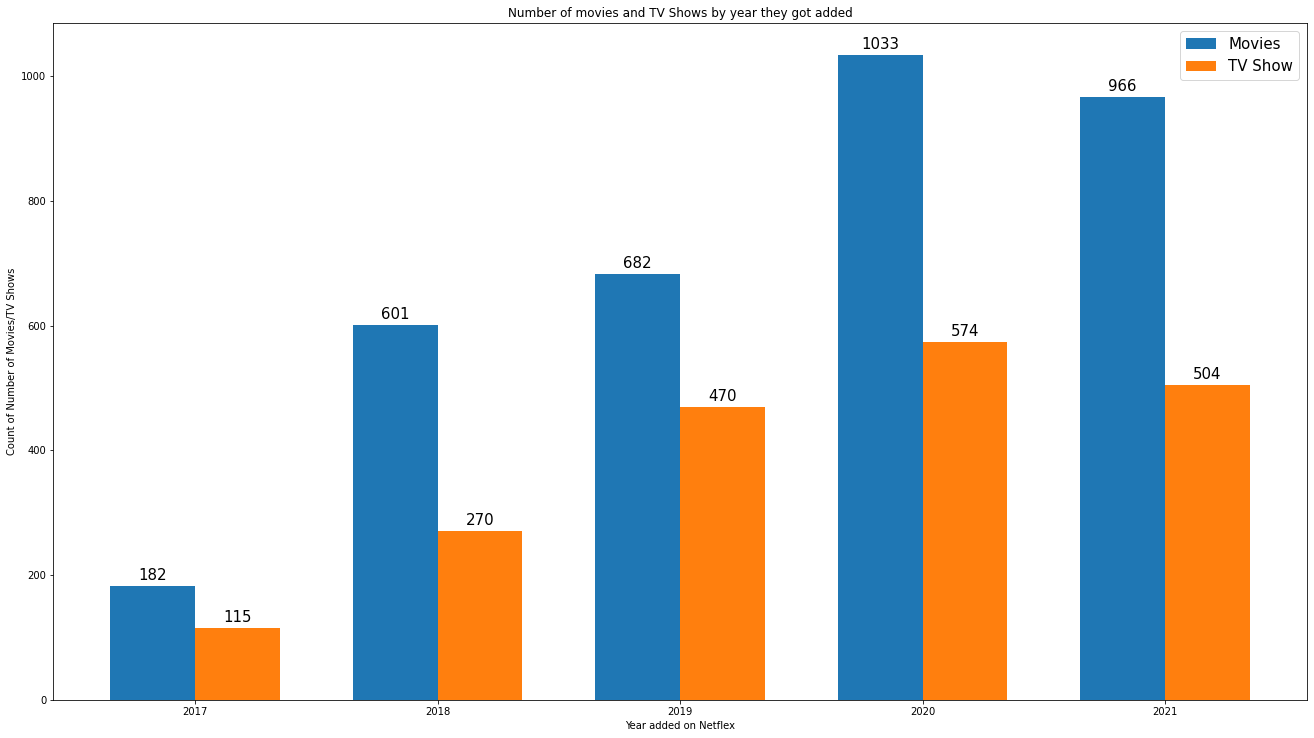

In [8]:
labels = n_data_added['year_added']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
Movies_rects = ax.bar(x - width/2, n_data_added['Movie'], width, label='Movies') # Add color here
TVshows_rects = ax.bar(x + width/2, n_data_added['TV Show'], width, label='TV Show')

# Add some text for labels, title, configure chart size
ax.set_xlabel('Year added on Netflex')
ax.set_ylabel('Count of Number of Movies/TV Shows')
ax.set_title('Number of movies and TV Shows by year they got added')
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(18.5, 10.5)
plt.rcParams.update({'font.size': 15})
ax.legend()

 #Function to generate labels on top of the bars
def gen_label(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


gen_label(Movies_rects)
gen_label(TVshows_rects)

fig.tight_layout()



plt.show()

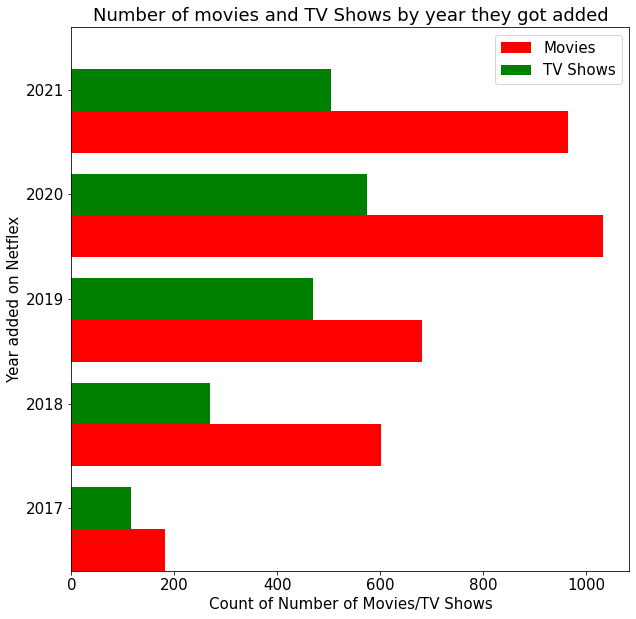

In [9]:
data = pd.DataFrame(dict(Year = n_data_added['year_added'],
                       Movie = n_data_added['Movie'], TVshow=n_data_added['TV Show'])) 

ind = np.arange(len(data))
width = 0.4

fig1, ax1 = plt.subplots()
ax1.barh(ind, data.Movie, width, color='red', label='Movies')
ax1.barh(ind + width, data.TVshow, width, color='green', label='TV Shows')

ax1.set(yticks=ind + width, yticklabels=data.Year, ylim=[2*width - 1, len(data)])

ax1.set_ylabel('Year added on Netflex')
ax1.set_xlabel('Count of Number of Movies/TV Shows')
ax1.set_title('Number of movies and TV Shows by year they got added')

ax1.legend()
fig1.set_size_inches(10, 10)
plt.show()

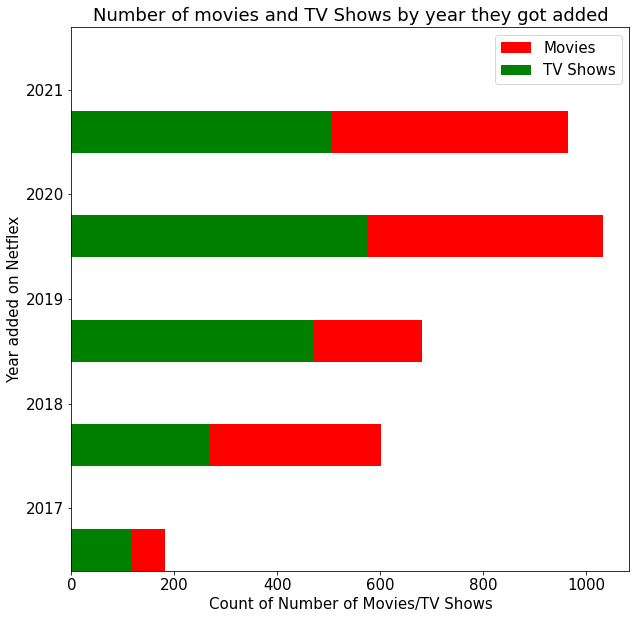

In [10]:
data = pd.DataFrame(dict(Year = n_data_added['year_added'],
                       Movie = n_data_added['Movie'], TVshow=n_data_added['TV Show'])) 

ind = np.arange(len(data))
width = 0.4

fig1, ax1 = plt.subplots()
ax1.barh(ind, data.Movie, width, color='red', label='Movies')
ax1.barh(ind, data.TVshow, width, color='green', label='TV Shows')

ax1.set(yticks=ind + width, yticklabels=data.Year, ylim=[2*width - 1, len(data)])

ax1.set_ylabel('Year added on Netflex')
ax1.set_xlabel('Count of Number of Movies/TV Shows')
ax1.set_title('Number of movies and TV Shows by year they got added')

ax1.legend()
fig1.set_size_inches(10, 10)
plt.show()


In [11]:
n_data_added['Total'] = n_data_added['Movie'] + n_data_added['TV Show']
# To select last few rows only
n_data_added_flt = n_data_added[-4:]
n_data_added_flt = n_data_added_flt.reset_index(drop=True) # For resetting index
n_data_added_flt.head()

type,year_added,Movie,TV Show,Total
0,2018,601,270,871
1,2019,682,470,1152
2,2020,1033,574,1607
3,2021,966,504,1470


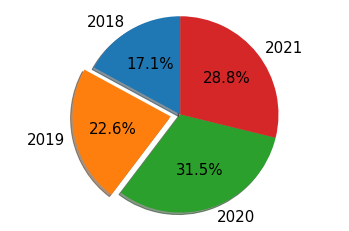

In [12]:
labels = n_data_added_flt['year_added']
sizes = n_data_added_flt['Total']
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice 

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

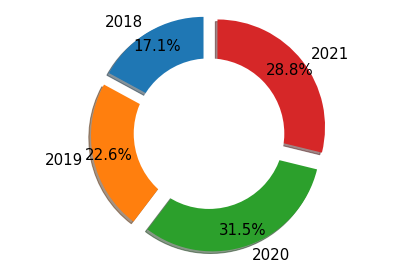

In [13]:
labels = n_data_added_flt['year_added']
sizes = n_data_added_flt['Total']
explode = (0.1, 0.1, 0.1, 0.1)  # "explode" all the slices

fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85) # Adjust font location

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Random Data')

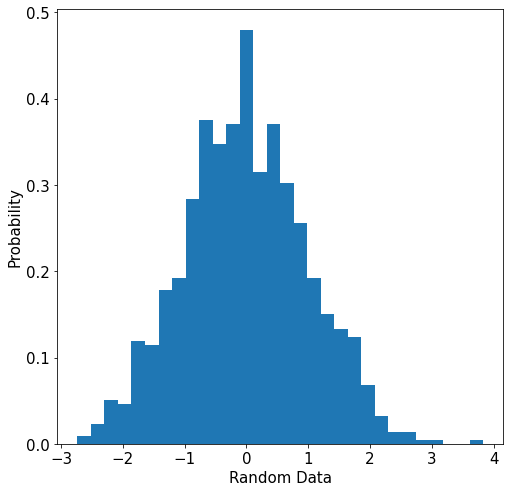

In [14]:
np.random.seed(421) # Use same seed to get the same set of values
x = np.random.normal(size=1000) # Generate random numbers
plt.figure(figsize=(8,8))
plt.hist(x, density=True, bins=30)  
plt.ylabel('Probability')
plt.xlabel('Random Data')
